### F21ETSMP Group Assignment 4
# Resistor Production
In production of 100$\Omega$ resistors, the resistance of each resistors will be a random variable that is Gaussian distributed with a mean of 100$\Omega$, and a standard deviation of $\sigma$.  
The resistors are sorted in 5% and 10% resistors. Thus all resistors within 5% of 100$\Omega$ are sorted in one package, and resistors between 5% and 10% are sorted in another package. Resistors deviating more than 10% are discarded.

## Question 1
Begin by assuming that $\sigma = 5 \Omega$.  
How many percent on average of the produced resistors are in each package, and how many are discarded?

To restate the problem a bit, since the percentage on average is just the probability of a resistor being in the given range, as a percentage, the question here is what's the following probabilities:  
5%: $P(95 < x < 105)$  
10%: $P(90 < x < 95 \lor 105 < x < 110)$  
discard: $P(x < 90 \lor 110 < x)$  
  
Since the gaussian distribution is symmetric around the mean, the 10% package can be calculated as twice one of the intervals, and the discarded transistors can be calculated as the complement to the entire 90 to 110 range.
Using the two following formulas, the above can then be calculated as follows:  
Probability of range from CDF: $P(a < x < b) = F_X(b)-F_X(a)$  
Probability of complement: $P(E^c) = 1-P(E)$

In [55]:
import scipy.stats
# Create a distribution object with the correct mean and standard deviation
T = scipy.stats.norm(loc=100.0, scale=5)

# Then calculate the percentage that's discarded
percent_5_pkg = (T.cdf(105) - T.cdf(95)) * 100
percent_10_pkg = 2 * (T.cdf(110) - T.cdf(105)) * 100
percent_discard = (1.0 - (T.cdf(110) - T.cdf(90))) * 100

resulting in the following percentages:  
__5% package:__ {{n(percent_5_pkg, digits=3)}}%  
__10% package:__ {{n(percent_10_pkg, digits=3)}}%  
__discarded:__ {{n(percent_discard, digits=3)}}%

## Question 2
Make a simulation that simulate 1000 resistors, and confirm the result obtained in question 1.

In [50]:
import matplotlib.pyplot as plt

# Create a sampleset using rvs (random variant set) on the distribution created above
resistor_sample = T.rvs(size=1000)

# Calculate the percentage of resistors that are discarded
tested_discard_pct = 100.*[90 <= r <= 110 for r in resistor_sample].count(False)/len(resistor_sample)

__Yielding {{n(tested_discard_pct, digits=3)}} which is fairly close to the expected 4.55__  
Note here that since n = 1000 is still a fairly small sample, the with a standard deviation of $\frac{5}{\sqrt{1000} } \approx 0.16 $ (from the central limit theorem)

## Question 3
What should the standard deviation be if the packages of 5% resistors contains half of the resistors?

Using the percent point function, quantile function, or inverse cumulative distribution function, one can calculate the value of X for which the probability of X being lower that or equal to matches the input.  
Since the normal distribution is symmetric around the mean, the problem can be stated as follows:  
$$ \text{ find }\sigma \text{ such that }P(X < 95) = 0.25$$  
Using the fact that any gausian distribution can be expressed as a linear transformation of the standard gaussian distribution one can expand the above statement:  
$$ P(X < 95) = F_X(95) = F_{\mathcal{N}}\left(\frac{95 - 100}{\sigma_X }\right) = 0.25 $$ 
Which can now be solved for sigma. To dissolve the CDF, the inverse of the CDF called the percent point function or quantile function can be used:  
$$ \frac{95 - 100}{\sigma_X } = F_{\mathcal{N}}^{-1}(0.25) \Leftrightarrow  \sigma_X = \frac{95 - 100}{F_{\mathcal{N}}^{-1}(0.25)} $$  

In [51]:
sigma_50pct = (95-100)/scipy.stats.norm.ppf(0.25)

Resulting in a __standard deviation of {{n(sigma_50pct, digits=3)}}__

## Question 4
Sample 1000 resistors, with the found standard deviation, plot the histogram along with the PDF and CDF.

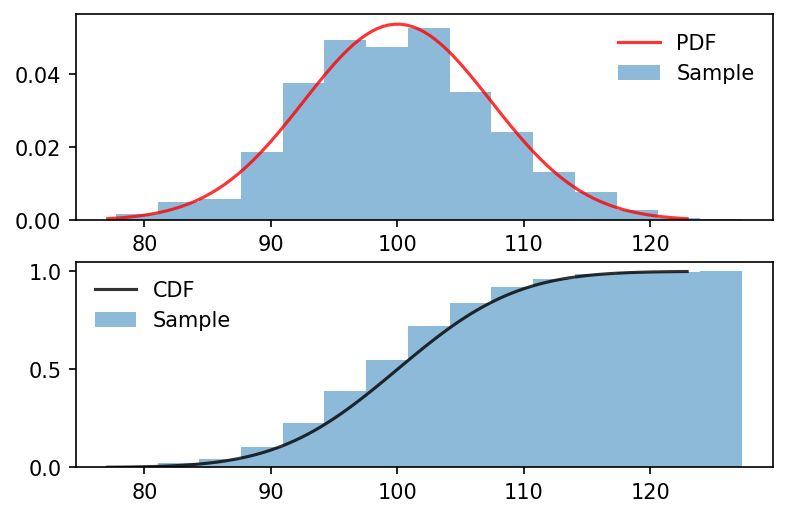

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Set plot params
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] = 150

# Create distribution and sample it
T = scipy.stats.norm(loc=100, scale=sigma_50pct)
sample = T.rvs(size=1000)

# Create a list of x coordinates to sample the PDF and CDF
x = np.linspace(T.ppf(0.001),
                T.ppf(0.999), 100)

# Create a two plot figure
fig, axes = plt.subplots(2, 1)

# Draw a histogram and the PDF in the first plot
axes[0].hist(sample, density=True, alpha=0.5, bins=15, 
             label='Sample')
axes[0].plot(x, T.pdf(x),
             'r-', alpha=0.8, label='PDF')
axes[0].legend(loc='best', frameon=False)

# And do the same for the CDF in the second
axes[1].hist(sample, density=True, cumulative=True, alpha=0.5, bins=15,
             label='Sample')
axes[1].plot(x, T.cdf(x),
             'k-', alpha=0.8, label='CDF')
axes[1].legend(loc='best', frameon=False)

# Show the plot
plt.show()

## Question 5
Find the mean and standard deviation of the 1000 samples.

These are easily found using the rv mean and var methods (equivalent to using the corresponding np methods on the sampled data):

In [53]:
sample_mean = sample.mean()
sample_std = sqrt(sample.var())

Yielding the following results:  
__The sample mean is {{n(sample_mean, digits = 4)}}__  
__The standard deviation of the sample is {{n(sample_std, digits = 4)}}__

## Question 6
Why are the found mean and standard deviation not exact?

This is because the sample is random. The mean and standard deviation of a repeated random sample approaches the theoretical mean and standard deviation as the sample size goes to infinity, as is stated in the central limit theorem:  
Let $X_1, X_2, \dots, X_n$ be i.i.d. random variables with mean $\mu$ and variance $\sigma^2$  
Let $\bar X$ be the random variable average:  
$$ \bar{X} = \frac{1}{n} \sum_{i = 1}^n{X_i} $$  
Then in the limit: $ n \rightarrow \infty$ we have that: 
$$ \bar X \sim \mathcal{N} \left( \mu, \frac{\sigma^2}{n} \right) $$
